In [101]:
#Import the Libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [102]:
log = pd.read_csv(r'C:/Users/Rohan/Desktop/Twitter API 5.csv')

In [103]:
# Twitter API credentials
AccessToken = log['Key'][0]
AccessTokenSecret = log['Key'][1]
ConsumerKey = log['Key'][2]
ConsumerKeySecret = log['Key'][3]

In [104]:
#Create the authentication object
authenticate = tweepy.OAuthHandler(ConsumerKey,ConsumerKeySecret)


In [105]:
#Set the acess token and access token secret
authenticate.set_access_token(AccessToken, AccessTokenSecret)

In [106]:
# Create the API object while passing in the auth information
api = tweepy.API(authenticate,wait_on_rate_limit=True)

In [107]:
#Wangchuk66

In [108]:
# Extract 100 Tweets from the twitter user
posts = api.user_timeline(screen_name = 'Wangchuk66',count = 100 ,lang = 'en' ,tweet_mode ='extended')

Unexpected parameter: lang


In [109]:
# Print the last 10 tweets from the account
print ('show the 10 tweets: \n')
for tweet in posts[0:10]:
    print (tweet.full_text + '\n')

show the 10 tweets: 

@TribalAffairsIn @MundaArjun @PMOIndia https://t.co/IsSHkTXcdG

Dear @narendramodi ji @PMOIndia
Truly grateful for #TribalPrideDay
Hope you'll also honor patriots of Ladakh by giving safeguarding to their culture, land &amp; environment under 6th Schedule of constitution.
It was promised 2 yrs ago &amp; still awaited
#SaveLadakh #6thSceduleForLadakh https://t.co/MI3flxFguU

Hon PM @narendramodi ji
Please #SaveLehAirport
I'm a great admirer of your vision of #CarbonNeutralLadakh &amp; #CarbonNeutralIndia but the #LehAirport is going 180° backwards...
We can act now or regret later!
@PMOIndia
@LehAirport @utladakhtourism @beeindiadigital @AAI__Official https://t.co/z17PWmZthZ

Himalayan Institute of Alternatives, Ladakh observed its 1st Annual Convocation Ceremony on October 27th, 2021 at HIAL campus. 
The Chief Guest for the occasion was Vandana Shiva, environmental activist, food sovereignty advocate, ecofeministHIAL #HIALconvocation  #VandanaShiva https://t.co/vk

In [110]:
# Print the last 10 tweets from the account
print ('show the 10 tweets: \n')
i=1
for tweet in posts[0:10]:
    print (str(i)+')'+ tweet.full_text + '\n')
    i = i + 1

show the 10 tweets: 

1)@TribalAffairsIn @MundaArjun @PMOIndia https://t.co/IsSHkTXcdG

2)Dear @narendramodi ji @PMOIndia
Truly grateful for #TribalPrideDay
Hope you'll also honor patriots of Ladakh by giving safeguarding to their culture, land &amp; environment under 6th Schedule of constitution.
It was promised 2 yrs ago &amp; still awaited
#SaveLadakh #6thSceduleForLadakh https://t.co/MI3flxFguU

3)Hon PM @narendramodi ji
Please #SaveLehAirport
I'm a great admirer of your vision of #CarbonNeutralLadakh &amp; #CarbonNeutralIndia but the #LehAirport is going 180° backwards...
We can act now or regret later!
@PMOIndia
@LehAirport @utladakhtourism @beeindiadigital @AAI__Official https://t.co/z17PWmZthZ

4)Himalayan Institute of Alternatives, Ladakh observed its 1st Annual Convocation Ceremony on October 27th, 2021 at HIAL campus. 
The Chief Guest for the occasion was Vandana Shiva, environmental activist, food sovereignty advocate, ecofeministHIAL #HIALconvocation  #VandanaShiva https:/

In [113]:
# Create a dataframe with a column called twets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

In [114]:
df

,Tweets
0,@TribalAffairsIn @MundaArjun @PMOIndia https:/...
1,Dear @narendramodi ji @PMOIndia\nTruly gratefu...
2,Hon PM @narendramodi ji\nPlease #SaveLehAirpor...
3,"Himalayan Institute of Alternatives, Ladakh ob..."
4,ITBP GOING GREEN\nIt was a pleasure meeting Sh...
...,...
92,Just came out on BBC World Service...\n\nBoyco...
93,Pleased to be speaking at RCC Chennai...\n\n@R...
94,"SAD IF TRUE\n“For now, downloading Chinese app..."
95,ANOTHER YOUNG INDIAN ENTREPRENEUR...\n\nBest w...


In [145]:
df.loc[0].values[0]

'   https://t.co/IsSHkTXcdG'

In [146]:
df.loc[1].values[0]

"Dear  ji \nTruly grateful for TribalPrideDay\nHope you'll also honor patriots of Ladakh by giving safeguarding to their culture, land &amp; environment under 6th Schedule of constitution.\nIt was promised 2 yrs ago &amp; still awaited\nSaveLadakh 6thSceduleForLadakh https://t.co/MI3flxFguU"

In [163]:
# Clean the text

# Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text) # Removed @mentions
    text = re.sub(r'#','',text) #Removing the "#" symbol
    text = re.sub(r'RT[\s]+','',text) #Removing RT
    text = re.sub(r'https?:\/\/\S+','',text) #Removing the hyper 
    #text = re.sub(r'https?:\/\/\S*','',text, flags=re.MULTILINE)
    
    
    return text

In [164]:
# Cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

In [165]:
#Show the cleaned text
df

,Tweets
0,
1,Dear ji \nTruly grateful for TribalPrideDay\n...
2,Hon PM ji\nPlease SaveLehAirport\nI'm a great...
3,"Himalayan Institute of Alternatives, Ladakh ob..."
4,ITBP GOING GREEN\nIt was a pleasure meeting Sh...
...,...
92,Just came out on BBC World Service...\n\nBoyco...
93,Pleased to be speaking at RCC Chennai...\n\n
94,"SAD IF TRUE\n“For now, downloading Chinese app..."
95,ANOTHER YOUNG INDIAN ENTREPRENEUR...\n\nBest w...


In [166]:
df.loc[0].values[0]

'   '

In [170]:
# Create a function to get the subjectivity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create two new columns

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['polarity'] = df['Tweets'].apply(getPolarity)

In [171]:
# Show the new Dataframe with the new columns
df

,Tweets,Subjectivity,polarity
0,,0.000,0.000000
1,Dear ji \nTruly grateful for TribalPrideDay\n...,0.000,0.000000
2,Hon PM ji\nPlease SaveLehAirport\nI'm a great...,0.375,0.400000
3,"Himalayan Institute of Alternatives, Ladakh ob...",0.000,0.000000
4,ITBP GOING GREEN\nIt was a pleasure meeting Sh...,0.400,-0.100000
...,...,...,...
92,Just came out on BBC World Service...\n\nBoyco...,0.000,0.000000
93,Pleased to be speaking at RCC Chennai...\n\n,1.000,0.500000
94,"SAD IF TRUE\n“For now, downloading Chinese app...",0.285,-0.131667
95,ANOTHER YOUNG INDIAN ENTREPRENEUR...\n\nBest w...,0.350,0.550000


In [175]:
# Visual word cloud
allWords = ' '.join([tweets for tweets in df['Tweets']])
wordCloud = WordCloud(width = 500,height=300,random_state=21,max_font_size=119).generate(allWords)

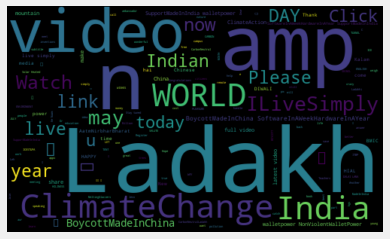

In [176]:
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [178]:
# Create a function to compute the negative , neutral and positive analysis

def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis'] = df['polarity'].apply(getAnalysis)

In [179]:
# Show the dataframe

df

,Tweets,Subjectivity,polarity,Analysis
0,,0.000,0.000000,Neutral
1,Dear ji \nTruly grateful for TribalPrideDay\n...,0.000,0.000000,Neutral
2,Hon PM ji\nPlease SaveLehAirport\nI'm a great...,0.375,0.400000,Positive
3,"Himalayan Institute of Alternatives, Ladakh ob...",0.000,0.000000,Neutral
4,ITBP GOING GREEN\nIt was a pleasure meeting Sh...,0.400,-0.100000,Negative
...,...,...,...,...
92,Just came out on BBC World Service...\n\nBoyco...,0.000,0.000000,Neutral
93,Pleased to be speaking at RCC Chennai...\n\n,1.000,0.500000,Positive
94,"SAD IF TRUE\n“For now, downloading Chinese app...",0.285,-0.131667,Negative
95,ANOTHER YOUNG INDIAN ENTREPRENEUR...\n\nBest w...,0.350,0.550000,Positive


In [183]:
# Print all of the positive tweets
j = 1
sortedDF = df.sort_values(by=['polarity'])
for i in range (0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i]=='Positive'):
        print(str(j)+')'+sortedDF['Tweets'][i])
        print()
        j = j+1

1)Hon PM  ji
Please SaveLehAirport
I'm a great admirer of your vision of CarbonNeutralLadakh &amp; CarbonNeutralIndia but the LehAirport is going 180° backwards...
We can act now or regret later!

   __Official 

2)WORLD HABITAT DAY
Theme 2021: Urban Action For A Carbon Free World
 has already declared CarbonNeutralLadakh

Happy to share today that our R&amp;D of last 30 years has yielded some interesting results in PassiveSolarHeated Houses (PSH)!
ClimateAction  ILiveSimply 

3)Just realised... 
Gandhiji's teachings are equally relevant in this digital social media age!
HappyGandhiJayati 

4)On KargilVijayDiwas SHARING A TOUCHING STORY
He was awarded Nishan-e-haider on recommendation of Brig Bajwa of Indian Army
Now u understand the song:
Phauladi hai seena apna phoolon jaisa dil hai...
Tan mein Vindhyachal ka bal hai Man mein Taj Mahal hai!

5)CHEEN KO JAWAAB
One Year Later!
Software in Week
Hardware in a YEAR ???

Click here to play new video...
Ladakh BMIC MakeInIndia 

6)LAEST LOW

In [190]:
# Print the negative tweets
j = 1
sortedDF = df.sort_values(by=['polarity'],ascending='False')
for i in range (0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i]=='Negative'):
        print(str(j)+ ') '+sortedDF['Tweets'][i])
        print()
        j = j+1


1) ITBP GOING GREEN
It was a pleasure meeting Sh Hemant Priyadarshi IPS,  ADG ITBP and  Sh Lhari Dorjey IG ITBP at HIAL.  Discussed various options for Passive Solar Heated buildings at forward locations on Indo China Border. 
GreenITBP  GreenArmy 
atmanirbharbharat 

2) AND FINALLY THE ICE TUNNEL VIDEO...
Another crazy idea!
Please click this link to pkay video:
 _Official 
ClimateChange CarbonNeutral Ladakh 

3) WAS AT ZOJILA TOP &amp; TUNNEL ENTRANCE
Curtesy National Highways Authority _Official to test out a crazy idea... making low-cost Ice Tunnels to keep open d approach road to Zojila Tunnel, saving 500 tns of Co2 n crores annually. ClimateChange CarbonNeutral
Stay tuned fr video 

4) AND FINALLY THE AWAITED VIDEO...
of the World's 1st Solar Heated Military Tent.

Explains how it works, what it costs n how it fights ClimateChange, 
No pollution, no power, no power bills
MadeInIndia ILiveSimply
Click link below &amp; share in your circle:


5) SOLAR HEATED MILITARY TENT 
for indi

<function matplotlib.pyplot.show(close=None, block=None)>

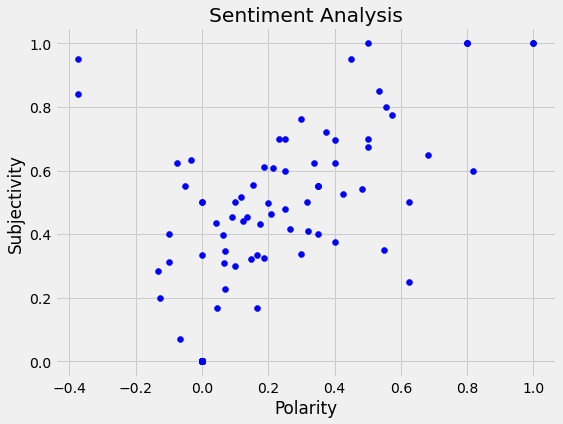

In [195]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['polarity'][i],df['Subjectivity'][i],color='Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show

In [197]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0]/df.shape[0])*100,1)

60.8

In [198]:
# Get the percentage of negative tweets
ptweets = df[df.Analysis == 'Negative']
ptweets = ptweets['Tweets']

round((ptweets.shape[0]/df.shape[0])*100,1)

10.3

In [199]:
# shaow the values counts

df['Analysis'].value_counts()

Positive    59
Neutral     28
Negative    10
Name: Analysis, dtype: int64

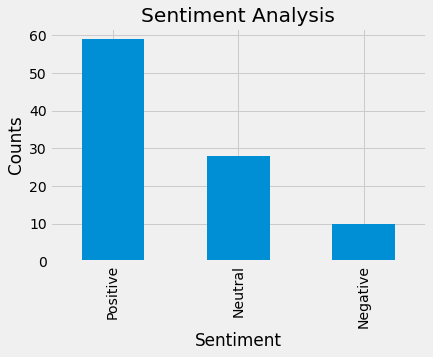

In [200]:
#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()